In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

**Limpeza de dados: PIB do Brasil**

In [20]:
pib_br = pd.read_csv("PIB 1995-2024.csv", sep=",")
pib_br = pd.DataFrame(pib_br)
pib_br['Data'] = pib_br['Data'].astype(str)
pib_br['Data'] = pib_br['Data'].str.replace('.', '/')
pib_br['Data'] = pd.to_datetime(pib_br['Data'], format= '%Y/%m')
pib_br = pib_br[(pib_br['Data'] >= '1995-01-01') & (pib_br['Data'] <= '2024-01-01')]
pib_br = pib_br.rename(columns={'PIB - R$ (milhões)  - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_PIB12 - ':'PIB Brasil'})
pib_br['PIB Brasil'] = pd.to_numeric(pib_br['PIB Brasil'], errors='coerce')
pib_br['PIB Brasil'] = pib_br['PIB Brasil'].apply(lambda x: '{:.2f}'.format(x))

**Limpeza de dados: PIB dos EUA**

In [21]:
pib_usa= pd.read_csv("GDP 1992-2024.csv", sep=",")
pib_usa=pd.DataFrame(pib_usa)
pib_usa=pib_usa.rename(columns={'Unnamed: 0':'Data'})

pib_usa=pib_usa[['Data', 'Monthly Nominal GDP Index']]
pib_usa=pib_usa.dropna()

pib_usa['Data'] = pib_usa['Data'].str.replace(' - ', '/')
pib_usa['Data'] = pib_usa['Data'].str.replace(' ', '')
meses = {
  'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 
  'May': '05', 'June': '06', 'July':'07', 'Jun': '06', 'Jul': '07', 'Aug': '08', 
  'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12',
}
for mes in meses.keys():
  pib_usa['Data'] = pib_usa['Data'].str.replace(mes, meses[mes])

pib_usa['Data'] = pd.to_datetime(pib_usa['Data'], format='%Y/%m')
pib_usa = pib_usa[(pib_usa['Data'] >= '1995-01-01') & (pib_usa['Data'] <= '2024-01-01')]
pib_usa = pib_usa.rename(columns={'Monthly Nominal GDP Index':'PIB EUA'})
pib_usa['PIB EUA'] = pd.to_numeric(pib_usa['PIB EUA'], errors='coerce')
pib_usa['PIB EUA'] = pib_usa['PIB EUA'].apply(lambda x: '{:.2f}'.format(x))

**Limpeza de dados: IBOV**

In [22]:
ibov = pd.read_csv("BVSP 1993-2024.csv", sep=",")
ibov = pd.DataFrame(ibov)
ibov['Date'] = ibov['Date'].astype(str)
ibov['Date'] = ibov['Date'].str.replace('-', '/')
ibov['Date'] = pd.to_datetime(ibov['Date'], format='%Y/%m/%d')
ibov = ibov.dropna()
ibov.set_index('Date', inplace=True)
ibov = ibov.resample('MS').first()
ibov.reset_index(inplace=True)
ibov = ibov[['Date', 'Close']]
ibov = ibov.rename(columns={'Date':'Data'})
ibov = ibov.rename(columns={'Close':'Fechamento IBOV'})
ibov = ibov[(ibov['Data'] >= '1995-01-01') & (ibov['Data'] <= '2024-01-01')]
ibov['Fechamento IBOV'] = pd.to_numeric(ibov['Fechamento IBOV'], errors='coerce')
ibov['Fechamento IBOV'] = ibov['Fechamento IBOV'].apply(lambda x: '{:.2f}'.format(x))

**Limpeza de dados: S&P500**

In [23]:
sp500 = pd.read_csv("SP500 1993-2024.csv", sep=",")
sp500 = sp500.dropna()
sp500 = sp500[['Data','Fechamento*']]
sp500['Data'] = sp500['Data'].astype(str)
sp500['Data'] = sp500['Data'].str.replace(' de ', '/').str.replace(' ', '').str.replace('.', '')
meses = {
  'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04', 
  'mai': '05', 'junho': '06', 'julho': '07', 'jun': '06', 'jul': '07', 'ago': '08', 
  'set': '09', 'out': '10', 'nov': '11', 'dez': '12',
}
for mes in meses.keys():
  sp500['Data'] = sp500['Data'].str.replace(mes, meses[mes])
sp500['Data'] = pd.to_datetime(sp500['Data'], format='%d/%m/%Y')
sp500 = sp500[(sp500['Data'] >= '1995-01-01') & (sp500['Data'] <= '2024-01-01')]
sp500.set_index('Data', inplace=True)
sp500.sort_values(by='Data', ascending=True, inplace=True)
sp500 = sp500.resample('MS').first()
sp500['Fechamento*'] = sp500['Fechamento*'].str.replace('.', '').str.replace(',', '.')
sp500 = sp500.rename(columns={'Fechamento*':'Fechamento S&P500'})
sp500['Fechamento S&P500'] = pd.to_numeric(sp500['Fechamento S&P500'], errors='coerce')
sp500['Fechamento S&P500'] = sp500['Fechamento S&P500'].apply(lambda x: '{:.2f}'.format(x))

In [25]:
dados = pd.merge(pib_usa, pib_br, on='Data')
dados = pd.merge(dados, ibov, on='Data')
dados = pd.merge(dados, sp500, on='Data')
dados.set_index('Data', inplace=True)
dados = dados.apply(pd.to_numeric, errors='coerce')
dados_numericos = dados.select_dtypes(include='number')
dados_anuais = dados_numericos.groupby(dados_numericos.index.year).mean()
dados_anuais.describe()

,PIB EUA,PIB Brasil,Fechamento IBOV,Fechamento S&P500
count,30.000000,30.000000,30.000000,30.000000
mean,15801.243333,362572.083889,52009.568333,1888.041500
std,5730.352819,260047.654497,37596.924153,1185.320284
min,7622.675833,58832.625000,3872.541667,537.620833
25%,11035.935417,128839.827083,14940.250000,1124.685000
50%,14889.692083,300786.933333,51310.291667,1350.917500
75%,19359.190625,540685.516667,67253.937500,2352.959375
max,28053.030000,904678.800000,132697.000000,4845.650000


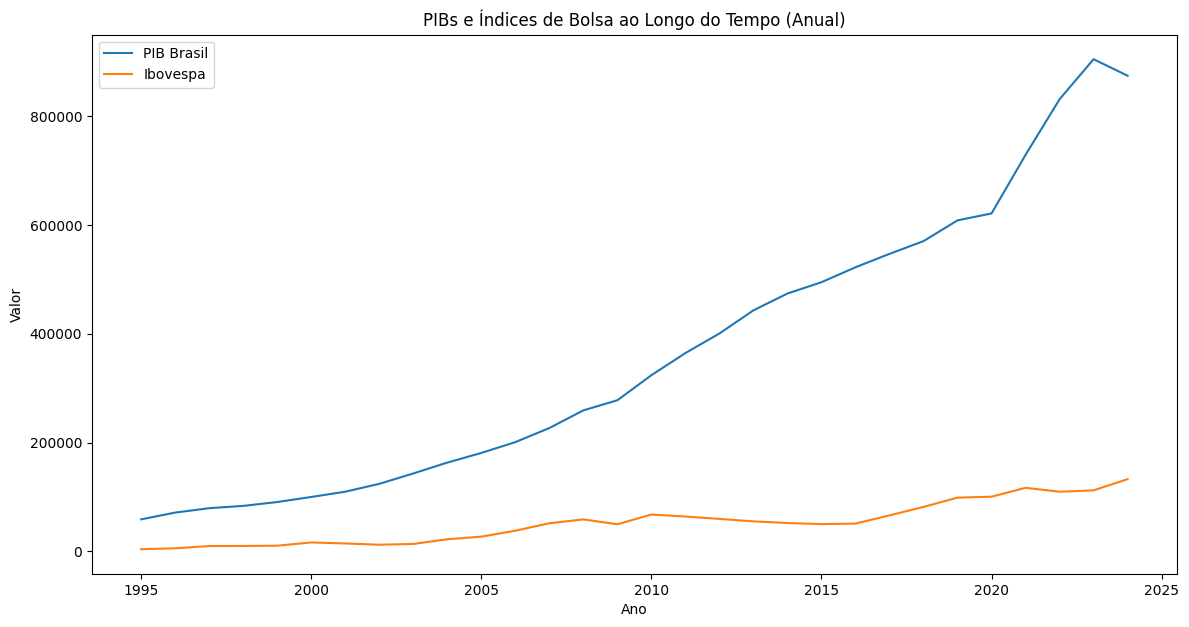

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(dados_anuais.index, dados_anuais['PIB Brasil'], label='PIB Brasil')
plt.plot(dados_anuais.index, dados_anuais['Fechamento IBOV'], label='Ibovespa')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('PIBs e Índices de Bolsa ao Longo do Tempo (Anual)')
plt.legend()
plt.show()

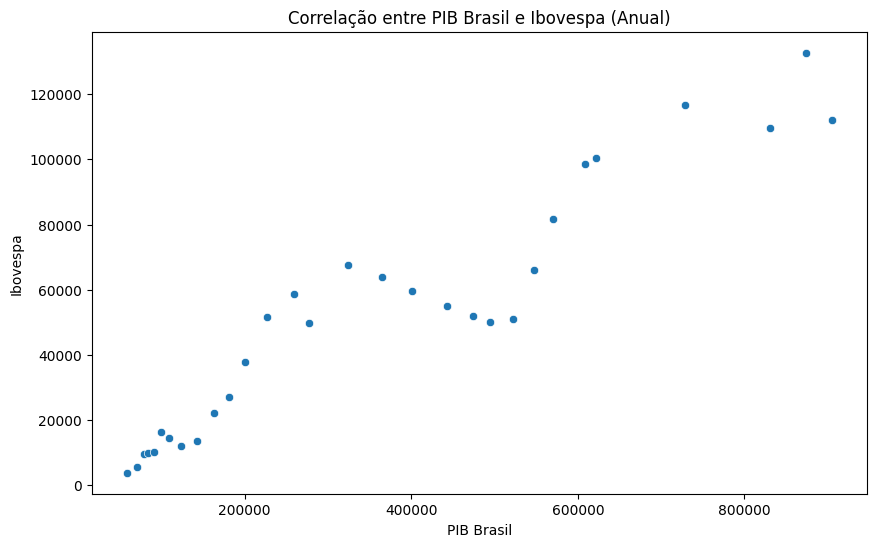

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB Brasil', y='Fechamento IBOV', data=dados_anuais)
plt.xlabel('PIB Brasil')
plt.ylabel('Ibovespa')
plt.title('Correlação entre PIB Brasil e Ibovespa (Anual)')
plt.show()

In [28]:
correlacao_br_ibov, _ = pearsonr(dados_anuais['PIB Brasil'], dados_anuais['Fechamento IBOV'])
print(f'Correlação entre PIB Brasil e Ibovespa (Anual): {correlacao_br_ibov}')

Correlação entre PIB Brasil e Ibovespa (Anual): 0.949637263684391


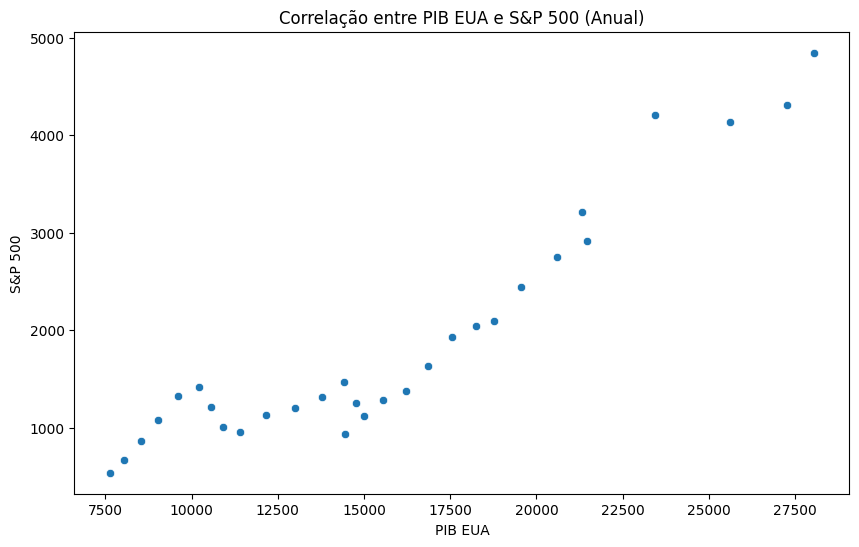

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB EUA', y='Fechamento S&P500', data=dados_anuais)
plt.xlabel('PIB EUA')
plt.ylabel('S&P 500')
plt.title('Correlação entre PIB EUA e S&P 500 (Anual)')
plt.show()

In [30]:
correlacao_eua_sp500, _ = pearsonr(dados_anuais['PIB EUA'], dados_anuais['Fechamento S&P500'])
print(f'Correlação entre PIB EUA e S&P 500 (Anual): {correlacao_eua_sp500}')

Correlação entre PIB EUA e S&P 500 (Anual): 0.93553586558732
